# Introduction to Feature Columns 
**Learning Objectives**


1. Load a CSV file using [Pandas](https://pandas.pydata.org/)
2. Create an input pipeline using tf.data
3. Create multiple types of feature columns

 

## Introduction 

In this notebook, you classify structured data (e.g. tabular data in a CSV file) using [feature columns](https://www.tensorflow.org/tutorials/structured_data/feature_columns).  Feature columns serve as a bridge to map from columns in a CSV file to features used to train a model. In a subsequent lab, we will use [Keras](https://www.tensorflow.org/guide/keras) to define the model.

Each learning objective will correspond to a __#TODO__ in this student lab notebook -- try to complete this notebook first and then review the [solution notebook](../solutions/feat.cols_tf.data.ipynb). 


## The Dataset

We will use a small [dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) provided by the Cleveland Clinic Foundation for Heart Disease. There are several hundred rows in the CSV. Each row describes   a patient, and each column describes an attribute. We will use this information to predict whether a patient has heart disease, which in this dataset is a binary classification task.

Following is a [description](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names) of this dataset. Notice there are both numeric and categorical columns.

>Column| Description| Feature Type | Data Type
>------------|--------------------|----------------------|-----------------
>Age | Age in years | Numerical | integer
>Sex | (1 = male; 0 = female) | Categorical | integer
>CP | Chest pain type (0, 1, 2, 3, 4) | Categorical | integer
>Trestbpd | Resting blood pressure (in mm Hg on admission to the hospital) | Numerical | integer
>Chol | Serum cholestoral in mg/dl | Numerical | integer
>FBS | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) | Categorical | integer
>RestECG | Resting electrocardiographic results (0, 1, 2) | Categorical | integer
>Thalach | Maximum heart rate achieved | Numerical | integer
>Exang | Exercise induced angina (1 = yes; 0 = no) | Categorical | integer
>Oldpeak | ST depression induced by exercise relative to rest | Numerical | float
>Slope | The slope of the peak exercise ST segment | Numerical | integer
>CA | Number of major vessels (0-3) colored by flourosopy | Numerical | integer
>Thal | 3 = normal; 6 = fixed defect; 7 = reversable defect | Categorical | string
>Target | Diagnosis of heart disease (1 = true; 0 = false) | Classification | integer

## Import TensorFlow and other libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf


from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

print("TensorFlow version: ",tf.version.VERSION)

TensorFlow version:  2.7.0


## Lab Task 1: Use Pandas to create a dataframe

[Pandas](https://pandas.pydata.org/) is a Python library with many helpful utilities for loading and working with structured data. We will use Pandas to download the dataset from a URL, and load it into a dataframe.

In [2]:
URL = 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv'
dataframe = pd.read_csv(URL)
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


## Split the dataframe into train, validation, and test

The dataset we downloaded was a single CSV file. As a best practice, Complete the below TODO by splitting this into train, validation, and test sets.

In [5]:
# TODO 1a
# TODO: Your code goes here
# tf.data.experimental.c
# train_size = 193
# val_size = 49
# test_size = 61
# train_ds = ds.take(train_size)
# val_ds = ds.skip(train_size).take(val_size)
# test_ds = ds.skip(train_size).skip(val_size)

train, test = train_test_split(dataframe, test_size=0.10)
train, val = train_test_split(dataframe, test_size=0.05)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

287 train examples
16 validation examples
31 test examples


## Lab Task 2: Create an input pipeline using tf.data

Next, we will wrap the dataframes with [tf.data](https://www.tensorflow.org/datasets). This will enable us  to use feature columns as a bridge to map from the columns in the Pandas dataframe to features used to train a model. If we were working with a very large CSV file (so large that it does not fit into memory), we would use tf.data to read it from disk directly. That is not covered in this lab.

Complete the `TODOs` in the below cells using `df_to_dataset` function. 


In [6]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) # TODO 2a: Your code goes here
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [7]:
batch_size = 5 # A small batch sized is used for demonstration purposes

In [8]:
# TODO 2b
train_ds = df_to_dataset(train, shuffle=True, batch_size=batch_size) # Your code goes here
val_ds = df_to_dataset(val, shuffle=True, batch_size=batch_size) # Your code goes here
test_ds = df_to_dataset(test, shuffle=True, batch_size=batch_size) # Your code goes here


## Understand the input pipeline

Now that we have created the input pipeline, let's call it to see the format of the data it returns. We have used a small batch size to keep the output readable.

In [9]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of ages:', feature_batch['age'])
  print('A batch of targets:', label_batch)

Every feature: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
A batch of ages: tf.Tensor([35 60 49 41 59], shape=(5,), dtype=int64)
A batch of targets: tf.Tensor([0 1 0 0 0], shape=(5,), dtype=int64)


## Lab Task 3: Demonstrate several types of feature column
TensorFlow provides many types of feature columns. In this section, we will create several types of feature columns, and demonstrate how they transform a column from the dataframe.

In [14]:
# We will use this batch to demonstrate several types of feature columns
example_batch = next(iter(train_ds))[0]

In [15]:
# A utility method to create a feature column
# and to transform a batch of data
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

### Numeric columns
The output of a feature column becomes the input to the model. A [numeric column](https://www.tensorflow.org/api_docs/python/tf/feature_column/numeric_column) is the simplest type of column. It is used to represent real valued features. When using this column, your model will receive the column value from the dataframe unchanged.

In [16]:
age = feature_column.numeric_column("age")
tf.feature_column.numeric_column
print(age)

NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


### Let's have a look at the output:

#### key='age'
A unique string identifying the input feature. It is used as the column name and the dictionary key for feature parsing configs, feature Tensor objects, and feature columns.

#### shape=(1,)
In the heart disease dataset, most columns from the dataframe are numeric.  Recall that tensors have a rank.  "Age" is a "vector" or "rank-1" tensor, which is like a list of values. A vector has 1-axis, thus the shape will always look like this:  shape=(3,), where 3 is a scalar (or single number) and with 1-axis.  

#### default_value=None
A single value compatible with dtype or an iterable of values compatible with dtype which the column takes on during tf.Example parsing if data is missing. A default value of None will cause tf.io.parse_example to fail if an example does not contain this column. If a single value is provided, the same value will be applied as the default value for every item. If an iterable of values is provided, the shape of the default_value should be equal to the given shape.

#### dtype=tf.float32
defines the type of values. Default value is tf.float32. Must be a non-quantized, real integer or floating point type.


#### normalizer_fn=None
If not None, a function that can be used to normalize the value of the tensor after default_value is applied for parsing. Normalizer function takes the input Tensor as its argument, and returns the output Tensor. (e.g. lambda x: (x - 3.0) / 4.2). Please note that even though the most common use case of this function is normalization, it can be used for any kind of Tensorflow transformations.


In [17]:
demo(age)

[[61.]
 [37.]
 [54.]
 [42.]
 [67.]]


### Bucketized columns
Often, you don't want to feed a number directly into the model, but instead split its value into different categories based on numerical ranges. Consider raw data that represents a person's age. Instead of representing age as a numeric column, we could split the age into several buckets using a [bucketized column](https://www.tensorflow.org/api_docs/python/tf/feature_column/bucketized_column). Notice the one-hot values below describe which age range each row matches.

In [19]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
demo(age_buckets)  # TODO 3a: Replace the blanks with a correct value


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Categorical columns
In this dataset, thal is represented as a string (e.g. 'fixed', 'normal', or 'reversible'). We cannot feed strings directly to a model. Instead, we must first map them to numeric values. The categorical vocabulary columns provide a way to represent strings as a one-hot vector (much like you have seen above with age buckets). The vocabulary can be passed as a list using [categorical_column_with_vocabulary_list](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list), or loaded from a file using [categorical_column_with_vocabulary_file](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_file).

In [20]:
thal = tf.feature_column.categorical_column_with_vocabulary_list(
      'thal', ['fixed', 'normal', 'reversible'])

thal_one_hot = tf.feature_column.indicator_column(thal)
demo(thal_one_hot)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In a more complex dataset, many columns would be categorical (e.g. strings). Feature columns are most valuable when working with categorical data. Although there is only one categorical column in this dataset, we will use it to demonstrate several important types of feature columns that you could use when working with other datasets.

### Embedding columns
Suppose instead of having just a few possible strings, we have thousands (or more) values per category. For a number of reasons, as the number of categories grow large, it becomes infeasible to train a neural network using one-hot encodings. We can use an embedding column to overcome this limitation. Instead of representing the data as a one-hot vector of many dimensions, an [embedding column](https://www.tensorflow.org/api_docs/python/tf/feature_column/embedding_column) represents that data as a lower-dimensional, dense vector in which each cell can contain any number, not just 0 or 1. The size of the embedding (8, in the example below) is a parameter that must be tuned.

Key point: using an embedding column is best when a categorical column has many possible values. We are using one here for demonstration purposes, so you have a complete example you can modify for a different dataset in the future.

In [21]:
# Notice the input to the embedding column is the categorical column
# we previously created
thal_embedding = tf.feature_column.embedding_column(thal, dimension=8)
demo(thal_embedding)

[[-0.20667987 -0.08103046  0.6762648  -0.15897278  0.05811552  0.5177783
   0.30911413  0.28602022]
 [ 0.09950383  0.49058977 -0.15330811  0.23288848 -0.01827423 -0.02049086
  -0.0644973  -0.0145819 ]
 [-0.20667987 -0.08103046  0.6762648  -0.15897278  0.05811552  0.5177783
   0.30911413  0.28602022]
 [ 0.09950383  0.49058977 -0.15330811  0.23288848 -0.01827423 -0.02049086
  -0.0644973  -0.0145819 ]
 [ 0.09950383  0.49058977 -0.15330811  0.23288848 -0.01827423 -0.02049086
  -0.0644973  -0.0145819 ]]


### Hashed feature columns

Another way to represent a categorical column with a large number of values is to use a [categorical_column_with_hash_bucket](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_hash_bucket). This feature column calculates a hash value of the input, then selects one of the `hash_bucket_size` buckets to encode a string. When using this column, you do not need to provide the vocabulary, and you can choose to make the number of hash_buckets significantly smaller than the number of actual categories to save space.

Key point: An important downside of this technique is that there may be collisions in which different strings are mapped to the same bucket. In practice, this can work well for some datasets regardless.

In [22]:
thal_hashed = tf.feature_column.categorical_column_with_hash_bucket(
      'thal', hash_bucket_size=1000)
demo(tf.feature_column.indicator_column(thal_hashed))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Crossed feature columns
Combining features into a single feature, better known as [feature crosses](https://developers.google.com/machine-learning/glossary/#feature_cross), enables a model to learn separate weights for each combination of features. Here, we will create a new feature that is the cross of age and thal. Note that `crossed_column` does not build the full table of all possible combinations (which could be very large). Instead, it is backed by a `hashed_column`, so you can choose how large the table is.

In [23]:
crossed_feature = tf.feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
demo(tf.feature_column.indicator_column(crossed_feature))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Choose which columns to use
We have seen how to use several types of feature columns. Now we will use them to train a model. The goal of this tutorial is to show you the complete code (e.g. mechanics) needed to work with feature columns. We have selected a few columns to train our model below arbitrarily.

Key point: If your aim is to build an accurate model, try a larger dataset of your own, and think carefully about which features are the most meaningful to include, and how they should be represented.

In [24]:
feature_columns = []

# numeric cols
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']:
  feature_columns.append(feature_column.numeric_column(header))

# bucketized cols
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

# indicator cols
thal = feature_column.categorical_column_with_vocabulary_list(
      'thal', ['fixed', 'normal', 'reversible'])
thal_one_hot = feature_column.indicator_column(thal)
feature_columns.append(thal_one_hot)

# embedding cols
thal_embedding = feature_column.embedding_column(thal, dimension=8)
feature_columns.append(thal_embedding)

# crossed cols
crossed_feature = feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
crossed_feature = feature_column.indicator_column(crossed_feature)
feature_columns.append(crossed_feature)

### How to Input Feature Columns to a Keras Model
Now that we have defined our feature columns, we now use a [DenseFeatures](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/DenseFeatures) layer to input them to a Keras model.  Don't worry if you have not used Keras before.  There is a more detailed video and lab introducing the Keras Sequential and Functional models.

In [25]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

Earlier, we used a small batch size to demonstrate how feature columns worked. We create a new input pipeline with a larger batch size.

In [26]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

## Create, compile, and train the model

In [27]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

Epoch 1/5
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/9 [==>...........................] - ETA: 5s - loss: 1.0785 - accuracy: 0.7188WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'age': <tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=int64>, 'sex': <tf.Tensor 'IteratorGetNext:8' shape=(None,) dtype=int64>, 'cp': <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=int64>, 'trestbps': <tf.Tensor 'IteratorGetNext:12' shape=(None,) dtype=int64>, 'chol': <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=int64>, 'fbs': <tf.Tensor 'IteratorGetNext:5' shape=(None,) dtype=int64>, 'restecg': <tf.Tensor 'IteratorGetNext:7' shape=(None,) dtype=int64>, 'thalach': <tf.Tensor 'IteratorGetNext:11' shape=(None,) dtype=int64>, 'exang': <tf.Tensor 'IteratorGetNext:4' shape=(None,) dtype=int64>, 'oldpeak': <tf.Tensor 'IteratorGetNext:6' shape=(None,) dtype

2022-02-21 08:36:56.893033: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 1s 23ms/step - loss: 1.2850 - accuracy: 0.6481 - val_loss: 0.6889 - val_accuracy: 0.6250
Epoch 2/5
9/9 [==============================] - 0s 2ms/step - loss: 0.8263 - accuracy: 0.6760 - val_loss: 0.3755 - val_accuracy: 0.8125
Epoch 3/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.6794 - val_loss: 0.4102 - val_accuracy: 0.8125
Epoch 4/5
9/9 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7596 - val_loss: 0.3405 - val_accuracy: 0.8750
Epoch 5/5
9/9 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7596 - val_loss: 0.5600 - val_accuracy: 0.8125


In [29]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

1/1 [==============================] - 0s 7ms/step - loss: 0.5770 - accuracy: 0.8065
Accuracy 0.8064516186714172


### Visualize the model loss curve

Next, we will use Matplotlib to draw the model's loss curves for training and validation.  A line plot is also created showing the accuracy over the training epochs for both the train (blue) and test (orange) sets.

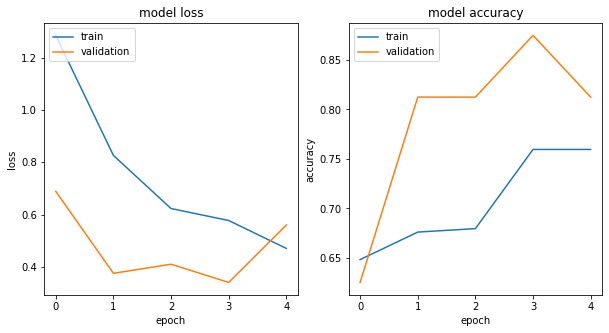

In [30]:
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');    
    
    

plot_curves(history, ['loss', 'accuracy'])

You can see that accuracy is at 77% for both the training and validation data, while loss bottoms out at about .477 after four epochs.

Key point: You will typically see best results with deep learning with much larger and more complex datasets. When working with a small dataset like this one, we recommend using a decision tree or random forest as a strong baseline. The goal of this tutorial is not to train an accurate model, but to demonstrate the mechanics of working with structured data, so you have code to use as a starting point when working with your own datasets in the future.

## Next steps
The best way to learn more about classifying structured data is to try it yourself. We suggest finding another dataset to work with, and training a model to classify it using code similar to the above. To improve accuracy, think carefully about which features to include in your model, and how they should be represented.

Copyright 2021 Google Inc.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.